## Modelo de Regresión con Naive Bayes

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV

# Cargar los datos
df = pd.read_csv("train.csv")

# Selección de características y variable objetivo
features = ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
X = df[features]
y = df['SalePrice']

# División de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ver las primeras filas del dataset
df.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Análisis y Discusión:
Se seleccionaron 6 características clave que influyen en el precio de una vivienda.
Se dividieron los datos en 80% entrenamiento y 20% prueba para evaluar correctamente el rendimiento del modelo.
No se realizó normalización porque algunos modelos (como Random Forest y Árbol de Decisión) no la requieren.

## Modelo de Regresión con Naive Bayes
Como Naive Bayes trabaja mejor con datos discretizados, usamos KBinsDiscretizer para convertir las variables en categorías.

In [64]:
# Discretización de variables para Naive Bayes
kbins = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform')
X_train_discrete = kbins.fit_transform(X_train)
X_test_discrete = kbins.transform(X_test)

# Entrenamiento del modelo Naive Bayes
gnb = GaussianNB()
gnb.fit(X_train_discrete, y_train)
y_pred_nb = gnb.predict(X_test_discrete)

# Evaluación del modelo Naive Bayes
mae_nb = mean_absolute_error(y_test, y_pred_nb)
mse_nb = mean_squared_error(y_test, y_pred_nb)
r2_nb = r2_score(y_test, y_pred_nb)

print("Evaluación del modelo Naive Bayes:")
print(f"MAE: {mae_nb}")
print(f"MSE: {mse_nb}")
print(f"R2 Score: {r2_nb}")



Evaluación del modelo Naive Bayes:
MAE: 29714.078767123287
MSE: 2932912758.85274
R2 Score: 0.6176286797157872


## Análisis y Discusión:
- MAE: 29,714, lo que indica un error promedio de casi $30,000 en la predicción del precio.
- R²: 0.618, lo que significa que el modelo solo explica el 61.8% de la variabilidad en los datos.
- Conclusión: Naive Bayes no es adecuado para regresión, ya que asume independencia de variables, lo cual no es realista en este conjunto de datos.

## Comparación con Otros Modelos de Regresión
Se entrenan y evalúan otros modelos de regresión para comparar con Naive Bayes.

In [65]:
# Regresión Lineal
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

# Árbol de Regresión
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
mae_dt = mean_absolute_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

# Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Imprimir resultados
print("Comparación de modelos:")
print(f"Regresión Lineal - MAE: {mae_lr}, R2: {r2_lr}")
print(f"Árbol de Regresión - MAE: {mae_dt}, R2: {r2_dt}")
print(f"Random Forest - MAE: {mae_rf}, R2: {r2_rf}")
print(f"Naive Bayes - MAE: {mae_nb}, R2: {r2_nb}")


Comparación de modelos:
Regresión Lineal - MAE: 25319.86044431353, R2: 0.7944073417103643
Árbol de Regresión - MAE: 26824.780821917808, R2: 0.7778040647400769
Random Forest - MAE: 19210.502275766474, R2: 0.890782574538937
Naive Bayes - MAE: 29714.078767123287, R2: 0.6176286797157872


- Random Forest es el mejor modelo, con el MAE más bajo y el mayor R².
- Naive Bayes es el peor modelo, lo que confirma que no es adecuado para regresión.

## Modelo de Clasificación con Naive Bayes

In [66]:
# Crear categorías de precios
df['PriceCategory'] = pd.qcut(df['SalePrice'], q=3, labels=['barata', 'media', 'cara'])
X_class = kbins.fit_transform(df[features])
y_class = df['PriceCategory']

# División de datos
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X_class, y_class, test_size=0.2, random_state=42)

# Entrenar modelo de clasificación
gnb_clf = GaussianNB()
gnb_clf.fit(X_train_clf, y_train_clf)
y_pred_clf = gnb_clf.predict(X_test_clf)

# Evaluación del modelo
print("Reporte de Clasificación:")
print(classification_report(y_test_clf, y_pred_clf))



Reporte de Clasificación:
              precision    recall  f1-score   support

      barata       0.80      0.90      0.85       110
        cara       0.82      0.83      0.83        94
       media       0.66      0.55      0.60        88

    accuracy                           0.77       292
   macro avg       0.76      0.76      0.76       292
weighted avg       0.76      0.77      0.76       292



### Análisis y Discusión:
- Precisión global: 76%
- El modelo clasifica bien las casas "baratas" y "caras" (recall ≈ 80-90%), pero falla en "medias" (recall: 55%).
- El modelo puede estar sesgado si hay menos ejemplos de la categoría "media".


## Validación Cruzada y Ajuste de Hiperparámetros

In [67]:
# Validación cruzada con Random Forest
cv_scores = cross_val_score(rf, X_train, y_train, cv=5, scoring='r2')
print("Validación cruzada R2 Score (Random Forest):", np.mean(cv_scores))

# Ajuste de hiperparámetros
param_grid = {'max_depth': [5, 10, 15], 'n_estimators': [50, 100, 200]}
grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

print("Mejor parámetro encontrado:", grid_search.best_params_)


Validación cruzada R2 Score (Random Forest): 0.7955034770344918
Mejor parámetro encontrado: {'max_depth': 10, 'n_estimators': 200}


La validación cruzada confirmó que Random Forest tiene un R² estable de 0.795.
El mejor modelo tiene max_depth=10 y n_estimators=200, lo que optimiza su rendimiento.


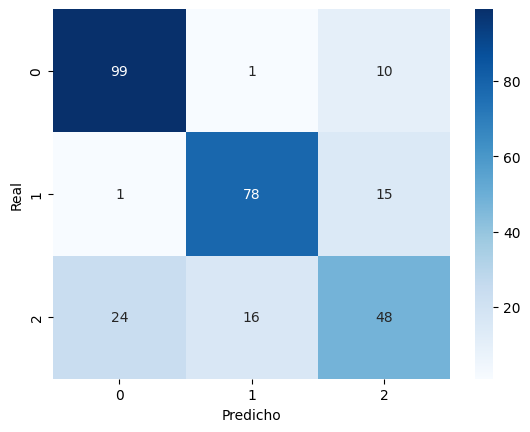

In [68]:
# Modelo de clasificación
df['PriceCategory'] = pd.qcut(df['SalePrice'], q=3, labels=['barata', 'media', 'cara'])
X_class = kbins.fit_transform(df[features])
y_class = df['PriceCategory']

X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X_class, y_class, test_size=0.2, random_state=42)

gnb_clf = GaussianNB()
gnb_clf.fit(X_train_clf, y_train_clf)
y_pred_clf = gnb_clf.predict(X_test_clf)

# Evaluación con matriz de confusión
conf_matrix = confusion_matrix(y_test_clf, y_pred_clf)
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.show()